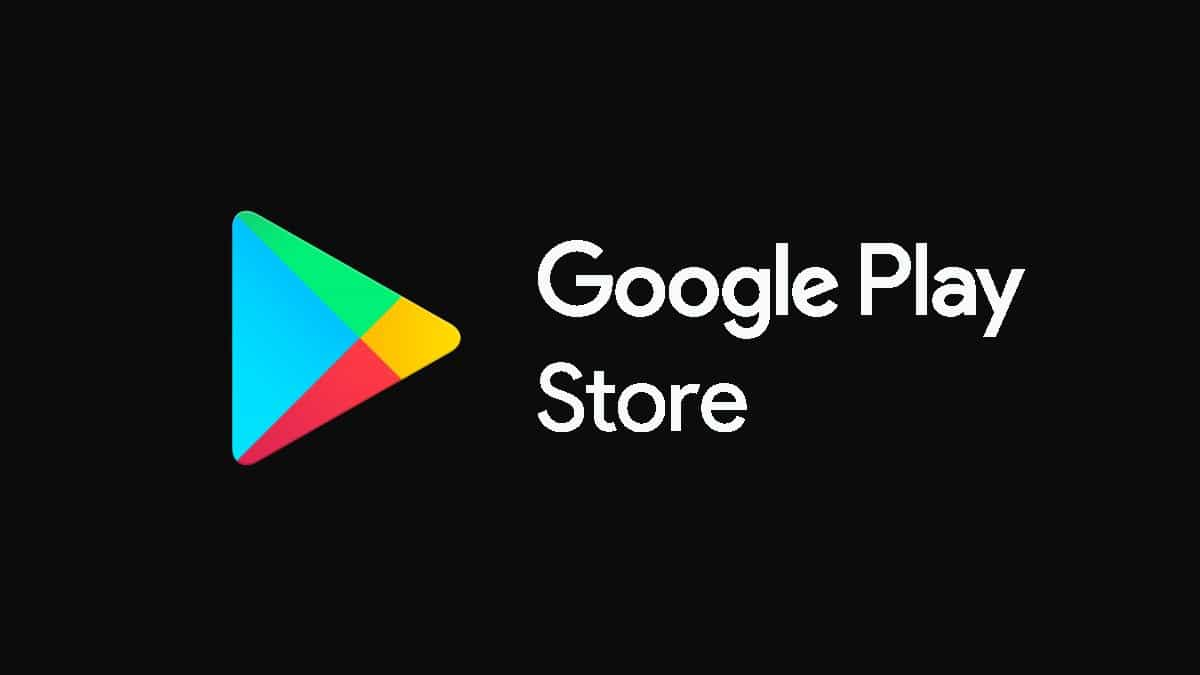

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import math
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('D:\\PGP IN DATA SCIENCE with Careerera\\Data sets\\app.csv')

In [3]:
df.head(5)

,id,app_name,genre,rating,reviews,cost_label,rate_5_pc,rate_4_pc,rate_3_pc,rate_2_pc,rate_1_pc,updated,size,installs,current_version,requires_android,content_rating,in_app_products,offered_by
0,2,Sonic the Hedgehog™ Classic,NaN,4.1,"193,898 total",Install,68.0272,10.20410,5.44218,3.401360,12.92520,"March 24, 2020",61M,"10,000,000+",3.5.1,4.4 and up,Rated for 3+,"₫45,000 per item",SEGA
1,3,Push'em all,Action,3.8,"119,679 total",Install,56.1798,12.92130,8.42697,5.056180,17.41570,"April 16, 2020",41M,"10,000,000+",1.14,4.4 and up,Rated for 3+,"₫92,000 per item",VOODOO
2,5,Sky Fighters 3D,Action,4.2,"196,685 total",Install,67.1141,11.40940,7.38255,3.355700,10.73830,"May 14, 2019",19M,"10,000,000+",1.5,4.0 and up,Rated for 7+,"₫42,000 - ₫2,100,000 per item",Doodle Mobile Ltd.
3,6,Robbery Bob,Action,4.3,"984,779 total",Install,74.0741,8.14815,5.18518,2.962960,9.62963,"March 25, 2020",42M,"50,000,000+",1.18.23,4.1 and up,Rated for 7+,"₫18,000 - ₫192,000 per item",Level Eight AB
4,7,Shadow Fight 2,Action,4.6,"12,861,970 total",Install,85.4701,5.98291,2.56410,0.854701,5.12821,"April 15, 2020",142M,"100,000,000+",2.5.1,4.1 and up,Rated for 12+,"₫6,000 - ₫1,149,999 per item",NEKKI


In [4]:
df.shape

(53732, 19)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53732 entries, 0 to 53731
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                53732 non-null  int64  
 1   app_name          53675 non-null  object 
 2   genre             48654 non-null  object 
 3   rating            47688 non-null  float64
 4   reviews           47688 non-null  object 
 5   cost_label        53653 non-null  object 
 6   rate_5_pc         47688 non-null  float64
 7   rate_4_pc         47688 non-null  float64
 8   rate_3_pc         47688 non-null  float64
 9   rate_2_pc         47688 non-null  float64
 10  rate_1_pc         47688 non-null  float64
 11  updated           53675 non-null  object 
 12  size              53675 non-null  object 
 13  installs          53658 non-null  object 
 14  current_version   53660 non-null  object 
 15  requires_android  53643 non-null  object 
 16  content_rating    53675 non-null  object

In [6]:
##convert object column to datetime and then extract year
df['updated']=pd.to_datetime(df.updated)

In [7]:
df['year']=df['updated'].dt.year

In [8]:
df.head(5)

,id,app_name,genre,rating,reviews,cost_label,rate_5_pc,rate_4_pc,rate_3_pc,rate_2_pc,rate_1_pc,updated,size,installs,current_version,requires_android,content_rating,in_app_products,offered_by,year
0,2,Sonic the Hedgehog™ Classic,NaN,4.1,"193,898 total",Install,68.0272,10.20410,5.44218,3.401360,12.92520,2020-03-24,61M,"10,000,000+",3.5.1,4.4 and up,Rated for 3+,"₫45,000 per item",SEGA,2020.0
1,3,Push'em all,Action,3.8,"119,679 total",Install,56.1798,12.92130,8.42697,5.056180,17.41570,2020-04-16,41M,"10,000,000+",1.14,4.4 and up,Rated for 3+,"₫92,000 per item",VOODOO,2020.0
2,5,Sky Fighters 3D,Action,4.2,"196,685 total",Install,67.1141,11.40940,7.38255,3.355700,10.73830,2019-05-14,19M,"10,000,000+",1.5,4.0 and up,Rated for 7+,"₫42,000 - ₫2,100,000 per item",Doodle Mobile Ltd.,2019.0
3,6,Robbery Bob,Action,4.3,"984,779 total",Install,74.0741,8.14815,5.18518,2.962960,9.62963,2020-03-25,42M,"50,000,000+",1.18.23,4.1 and up,Rated for 7+,"₫18,000 - ₫192,000 per item",Level Eight AB,2020.0
4,7,Shadow Fight 2,Action,4.6,"12,861,970 total",Install,85.4701,5.98291,2.56410,0.854701,5.12821,2020-04-15,142M,"100,000,000+",2.5.1,4.1 and up,Rated for 12+,"₫6,000 - ₫1,149,999 per item",NEKKI,2020.0


In [9]:
## how many years of data
df.year.unique()

array([2020., 2019., 2018., 2017., 2016., 2015., 2013., 2014., 2012.,
         nan, 2011., 2010.])

In [10]:
df.dropna(inplace=True)
df.drop('id', axis=1, inplace=True)

In [11]:
df.head(5)

,app_name,genre,rating,reviews,cost_label,rate_5_pc,rate_4_pc,rate_3_pc,rate_2_pc,rate_1_pc,updated,size,installs,current_version,requires_android,content_rating,in_app_products,offered_by,year
1,Push'em all,Action,3.8,"119,679 total",Install,56.1798,12.92130,8.42697,5.056180,17.41570,2020-04-16,41M,"10,000,000+",1.14,4.4 and up,Rated for 3+,"₫92,000 per item",VOODOO,2020.0
2,Sky Fighters 3D,Action,4.2,"196,685 total",Install,67.1141,11.40940,7.38255,3.355700,10.73830,2019-05-14,19M,"10,000,000+",1.5,4.0 and up,Rated for 7+,"₫42,000 - ₫2,100,000 per item",Doodle Mobile Ltd.,2019.0
3,Robbery Bob,Action,4.3,"984,779 total",Install,74.0741,8.14815,5.18518,2.962960,9.62963,2020-03-25,42M,"50,000,000+",1.18.23,4.1 and up,Rated for 7+,"₫18,000 - ₫192,000 per item",Level Eight AB,2020.0
4,Shadow Fight 2,Action,4.6,"12,861,970 total",Install,85.4701,5.98291,2.56410,0.854701,5.12821,2020-04-15,142M,"100,000,000+",2.5.1,4.1 and up,Rated for 12+,"₫6,000 - ₫1,149,999 per item",NEKKI,2020.0
5,Cover Strike - 3D Team Shooter,Action,4.0,"43,322 total",Install,62.8931,9.43396,6.28931,4.402520,16.98110,2020-03-25,60M,"10,000,000+",1.2.369,4.1 and up,Rated for 12+,"₫23,000 - ₫1,200,000 per item",Top Actions,2020.0


In [12]:
## which app has highest installs 
df.groupby('app_name').installs.max().sort_values(ascending=False)

app_name
Netflix                                               500,000,000+
Hill Climb Racing                                     500,000,000+
Dropbox: Cloud Storage to Backup, Sync, File Share    500,000,000+
Truecaller: Caller ID, spam blocking & call record    500,000,000+
Adobe Acrobat Reader: PDF Viewer, Editor & Creator    500,000,000+
                                                          ...     
SyncCal - Exchange to Google                                1,000+
Dynawrite                                                   1,000+
Wort Raten                                                  1,000+
Radio Cuba: free Cuban FM radio live                        1,000+
Sudoku Zenkai                                               1,000+
Name: installs, Length: 20305, dtype: object

In [13]:
netflix=df[df['app_name']=='Netflix']
netflix

,app_name,genre,rating,reviews,cost_label,rate_5_pc,rate_4_pc,rate_3_pc,rate_2_pc,rate_1_pc,updated,size,installs,current_version,requires_android,content_rating,in_app_products,offered_by,year
2324,Netflix,Entertainment,4.5,"8,512,882 total",Install,78.7402,10.2362,3.14961,1.5748,6.29921,2020-04-16,12M,"500,000,000+",7.52.0 build 19 34798,5.0 and up,Rated for 12+,"₫178,137 - ₫272,000 per item","Netflix, Inc.",2020.0


In [14]:
## which app's overall rating is low and high
df.groupby('app_name').rating.mean().sort_values(ascending=False)

app_name
Cover Shooting Strike : New Paintball Games         5.0
Schools Athletics                                   5.0
Bottle Cap Challenge                                5.0
Kick King                                           5.0
Puzzle GameBox (classic puzzles In One App)         5.0
                                                   ... 
Bgcupid                                             1.6
Pittsburgh Healthy Ride                             1.6
BBC Music Magazine - Classical Interviews & News    1.5
Tingles ASMR - Relaxing & Soothing Sleep Sounds     1.3
Spatula: TFT Cheat Sheet                            1.1
Name: rating, Length: 20305, dtype: float64

In [15]:
df.genre.unique()

array(['Action', 'Puzzle', 'Art & Design', 'Weather', 'Strategy',
       'Sports', 'Arcade', 'Tools', 'Dating', 'Simulation', 'Racing',
       'Events', 'Casual', 'Role Playing', 'Adventure', 'Card', 'Casino',
       'Lifestyle', 'Entertainment', 'Music', 'House & Home',
       'Food & Drink', 'Auto & Vehicles', 'Health & Fitness',
       'Communication', 'Productivity', 'Finance', 'Photography',
       'Books & Reference', 'Board', 'Education', 'Music & Audio',
       'Beauty', 'Video Players & Editors', 'Educational',
       'Personalization', 'Business', 'Social', 'Travel & Local', 'Word',
       'Comics', 'Trivia', 'Shopping', 'News & Magazines',
       'Maps & Navigation', 'Medical', 'Parenting', 'Libraries & Demo'],
      dtype=object)

In [16]:
## within  genre which app has highest and lowest rating

In [17]:
df.groupby('genre')['app_name', 'rating'].min()

,app_name,rating
genre,,
Action,4Force Online,1.8
Adventure,1% Survival Escape,2.8
Arcade,1942,2.3
Art & Design,"Ad Maker, Video Editor, Explainer Video Maker",2.8
Auto & Vehicles,AGAMA Car Launcher,3.2
Beauty,Abs Workout - Lose Weight in 30 Days. Fitness ...,2.5
Board,101 Yüzbir Okey Elit,2.5
Books & Reference,24symbols – online books,2.1
Business,1C:Small Business Mobile,2.2


In [18]:
df.groupby('genre')['app_name', 'rating'].max()

,app_name,rating
genre,,
Action,🐓Chicken Gun🐓,5.0
Adventure,💡The Office Quest,4.8
Arcade,😁 Dead Defence,5.0
Art & Design,ibis Paint X,4.8
Auto & Vehicles,"Проверка авто по базе ГИБДД, VIN, ДТП: Антипер...",4.8
Beauty,Photo Editor - Photo art & Photo Lab - Art Fil...,4.7
Board,🐍 Snakes and Ladders - Free Board Games 🎲,5.0
Books & Reference,🌼 Japanese Dictionary,4.9
Business,🏠 Работа на дому / Фриланс / Подработка: ALOT.PRO,5.0


In [19]:
df.groupby('genre')['app_name', 'rating'].mean()

,rating
genre,
Action,4.140636
Adventure,4.210110
Arcade,4.213692
Art & Design,4.282418
Auto & Vehicles,4.348000
Beauty,4.185000
Board,4.204737
Books & Reference,4.367748
Business,4.242570


In [20]:
## which app has large app size
df.groupby('app_name')['size'].max().sort_values()

app_name
Profit! - Deposit Calculator                                        1.0M
LRC Editor                                                          1.0M
Snake WiFi                                                          1.0M
Wolkenkratzer                                                       1.1M
Odlotowe Wieżowce                                                   1.1M
                                                             ...        
Total Domination - Reborn                             Varies with device
Microsoft Excel: View, Edit, & Create Spreadsheets    Varies with device
Cat Evolution Clicker                                 Varies with device
ScytheKick: Scythe Companion                          Varies with device
Korean Recipes                                        Varies with device
Name: size, Length: 20305, dtype: object

In [21]:
## Genre wise app size
df.groupby('genre')['app_name', 'size'].max()

,app_name,size
genre,,
Action,🐓Chicken Gun🐓,Varies with device
Adventure,💡The Office Quest,Varies with device
Arcade,😁 Dead Defence,Varies with device
Art & Design,ibis Paint X,Varies with device
Auto & Vehicles,"Проверка авто по базе ГИБДД, VIN, ДТП: Антипер...",Varies with device
Beauty,Photo Editor - Photo art & Photo Lab - Art Fil...,82M
Board,🐍 Snakes and Ladders - Free Board Games 🎲,Varies with device
Books & Reference,🌼 Japanese Dictionary,Varies with device
Business,🏠 Работа на дому / Фриланс / Подработка: ALOT.PRO,Varies with device


In [22]:
df.groupby('genre')['app_name', 'size'].min()

,app_name,size
genre,,
Action,4Force Online,100M
Adventure,1% Survival Escape,100M
Arcade,1942,1.0M
Art & Design,"Ad Maker, Video Editor, Explainer Video Maker",10M
Auto & Vehicles,AGAMA Car Launcher,10M
Beauty,Abs Workout - Lose Weight in 30 Days. Fitness ...,15M
Board,101 Yüzbir Okey Elit,102M
Books & Reference,24symbols – online books,10.0M
Business,1C:Small Business Mobile,1.2M


In [23]:
## unique app development company
df.offered_by.nunique()

9319

In [24]:
## which company has more apps on play store
df.offered_by.value_counts()

mobirix                  83
Tapps Games              72
VOODOO                   47
BitMango                 46
Gameloft SE              41
                         ..
VeBest                    1
Martin Florek             1
Smart Applications YE     1
orangemonkie team         1
Chois & Co.               1
Name: offered_by, Length: 9319, dtype: int64

In [25]:
df.groupby('genre').offered_by.value_counts().sort_values()

genre            offered_by             
Music & Audio    Paolo Valerdi               1
Productivity     Ultimate Mobile             1
                 Uncaught Exception Inc.     1
                 UniqTec Inc.                1
                 Unstatic Ltd Co             1
                                            ..
Food & Drink     DIL                        29
Music & Audio    Radioworld FM              30
Personalization  thema                      31
Puzzle           BitMango                   36
Casual           Tapps Games                40
Name: offered_by, Length: 12877, dtype: int64

In [26]:
## apps offered by mobirisk
mobirix=df[df['offered_by']=='mobirix']
mobirix

,app_name,genre,rating,reviews,cost_label,rate_5_pc,rate_4_pc,rate_3_pc,rate_2_pc,rate_1_pc,updated,size,installs,current_version,requires_android,content_rating,in_app_products,offered_by,year
259,Tower Defense King,Strategy,4.3,"128,539 total",Install,66.2252,15.8940,8.60927,2.64901,6.62252,2019-12-19,44M,"5,000,000+",1.4.5,4.1 and up,Rated for 3+,"₫66,000 - ₫2,200,000 per item",mobirix,2019.0
274,Jigsaw Puzzle World,Puzzle,4.3,"90,794 total",Install,66.2252,17.8808,8.60927,1.98676,5.29801,2020-01-06,22M,"10,000,000+",2020.01.06,4.1 and up,Rated for 3+,"₫44,000 - ₫663,000 per item",mobirix,2020.0
430,Fishing Hook,Sports,4.4,"1,537,041 total",Install,69.4444,14.5833,8.33333,2.08333,5.55556,2020-04-16,54M,"50,000,000+",2.3.2,4.1 and up,Rated for 3+,"₫44,000 - ₫2,200,000 per item",mobirix,2020.0
435,Hit & Knock down,Sports,4.3,"361,071 total",Install,67.5676,15.5405,8.78378,2.70270,5.40541,2020-03-12,63M,"10,000,000+",1.3.3,4.1 and up,Rated for 3+,"₫66,000 - ₫2,200,000 per item",mobirix,2020.0
465,World Soccer League,Sports,4.2,"1,530,564 total",Install,68.4931,10.2740,6.84932,3.42466,10.95890,2020-03-16,46M,"100,000,000+",1.9.9.4,4.0 and up,Rated for 7+,"₫44,000 - ₫125,000 per item",mobirix,2020.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39825,Moving Ball Puzzle,Puzzle,4.3,"25,540 total",Install,68.4931,12.3288,8.21918,2.73973,8.21918,2020-04-03,14M,"5,000,000+",1.23,4.1 and up,Rated for 3+,"₫111,000 - ₫1,100,000 per item",mobirix,2020.0
43359,Pro Billiards 3balls 4balls,Sports,4.2,430 total,Install,55.8659,29.0503,7.82123,1.67598,5.58659,2020-04-02,49M,"10,000+",1.0.6,4.4 and up,Rated for 3+,"₫66,000 - ₫2,200,000 per item",mobirix,2020.0
43808,Pinball King,Arcade,4.2,"46,411 total",Install,57.1429,21.1429,12.00000,3.42857,6.28571,2019-11-27,54M,"5,000,000+",1.3.3,4.1 and up,Rated for 3+,"₫66,000 - ₫2,200,000 per item",mobirix,2019.0
43817,Color Ball Blast,Arcade,4.4,"2,460 total",Install,74.0741,10.3704,7.40741,2.96296,5.18518,2020-03-09,33M,"100,000+",1.4.0,4.1 and up,Rated for 3+,"₫19,000 - ₫87,000 per item",mobirix,2020.0


In [27]:
## category of apps on play store by mobirix
mobirix.groupby('offered_by')['genre'].value_counts().sort_values()

offered_by  genre        
mobirix     Board             1
            Entertainment     1
            Racing            2
            Simulation        2
            Role Playing      5
            Strategy          6
            Action            7
            Arcade           18
            Sports           19
            Puzzle           22
Name: genre, dtype: int64

In [28]:
mobirix.genre.value_counts().index

Index(['Puzzle', 'Sports', 'Arcade', 'Action', 'Strategy', 'Role Playing',
       'Simulation', 'Racing', 'Board', 'Entertainment'],
      dtype='object')

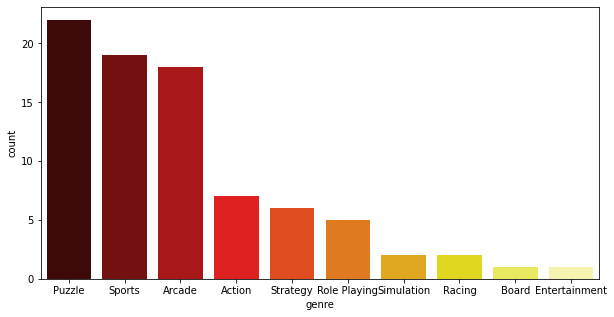

In [29]:
plt.figure(figsize=(10,5))
sns.countplot(x='genre', data=mobirix, palette='hot',
              order=mobirix.genre.value_counts().index);

In [30]:
## Groupby the apps wrt content_rating
df.content_rating.value_counts()

Rated for 3+     15018
Rated for 12+     3128
Rated for 7+      1517
Rated for 16+      474
Rated for 18+      410
Name: content_rating, dtype: int64

In [31]:
df.content_rating.value_counts().index

Index(['Rated for 3+', 'Rated for 12+', 'Rated for 7+', 'Rated for 16+',
       'Rated for 18+'],
      dtype='object')

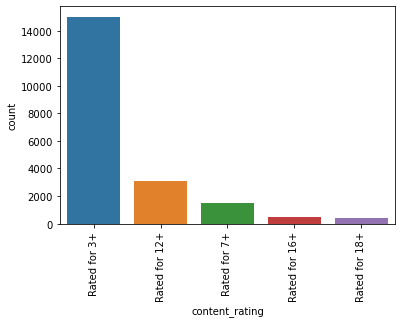

In [32]:
sns.countplot(x='content_rating', data=df,
              order=df.content_rating.value_counts().index)
plt.xticks(rotation=90);

In [33]:
## genre and content rating
df.groupby('genre').content_rating.value_counts()

genre    content_rating
Action   Rated for 12+     314
         Rated for 7+      307
         Rated for 3+      275
         Rated for 16+     170
         Rated for 18+      34
                          ... 
Weather  Rated for 16+       1
Word     Rated for 3+      422
         Rated for 12+      23
         Rated for 7+        5
         Rated for 16+       2
Name: content_rating, Length: 161, dtype: int64

In [34]:
df.groupby('genre')['rate_5_pc','rate_4_pc','rate_3_pc','rate_2_pc','rate_1_pc'].mean()

,rate_5_pc,rate_4_pc,rate_3_pc,rate_2_pc,rate_1_pc
genre,,,,,
Action,66.271661,11.415371,6.814353,3.353282,12.145338
Adventure,67.343639,12.352637,6.828661,3.313952,10.161115
Arcade,68.024332,11.632251,6.824915,3.219967,10.298539
Art & Design,69.608224,12.979743,5.600080,2.412138,9.399816
Auto & Vehicles,72.564542,11.867381,4.906429,2.288704,8.372956
Beauty,67.102610,12.938171,5.064290,2.629992,12.264922
Board,67.565737,12.520571,6.060125,2.969468,10.884108
Books & Reference,72.529916,12.586362,4.880950,2.049035,7.953742
Business,69.179873,12.325760,5.469820,2.432129,10.592424


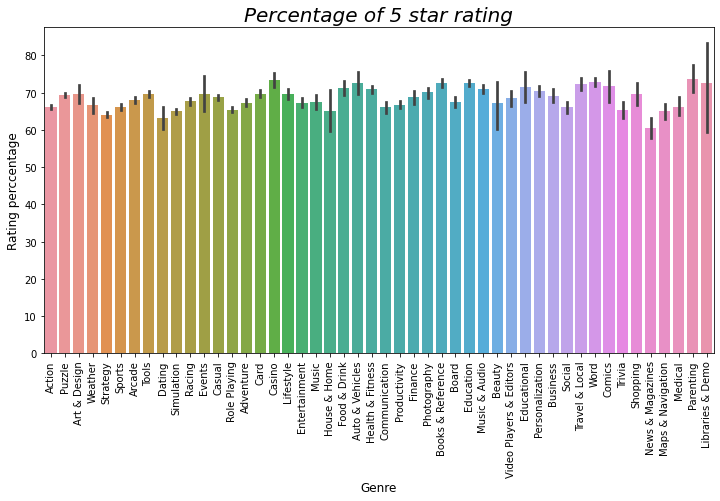

In [35]:
## which genre has highest percentage of 5 stars rating
plt.figure(figsize=(12,6))
sns.barplot(x='genre', y='rate_5_pc', data=df)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Rating perccentage', fontsize=12)
plt.xticks(rotation=90)
plt.title('Percentage of 5 star rating', fontsize=20, fontstyle='italic');

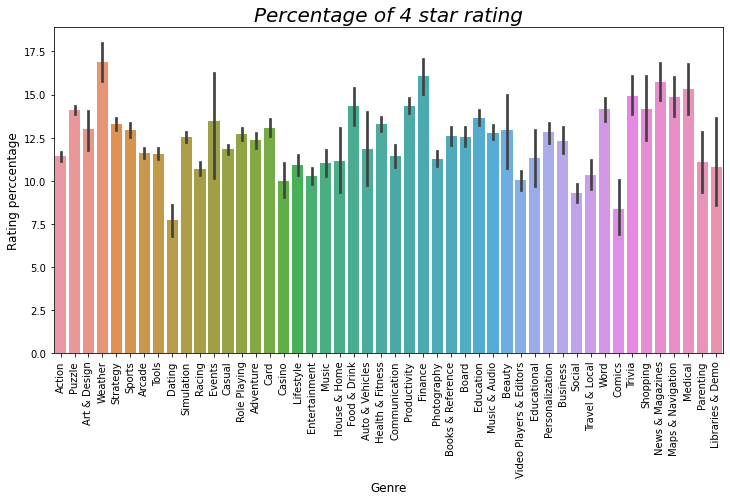

In [36]:
## which genre has highest percentage of 4 stars rating
plt.figure(figsize=(12,6))
sns.barplot(x='genre', y='rate_4_pc', data=df)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Rating perccentage', fontsize=12)
plt.xticks(rotation=90)
plt.title('Percentage of 4 star rating', fontsize=20, fontstyle='italic');

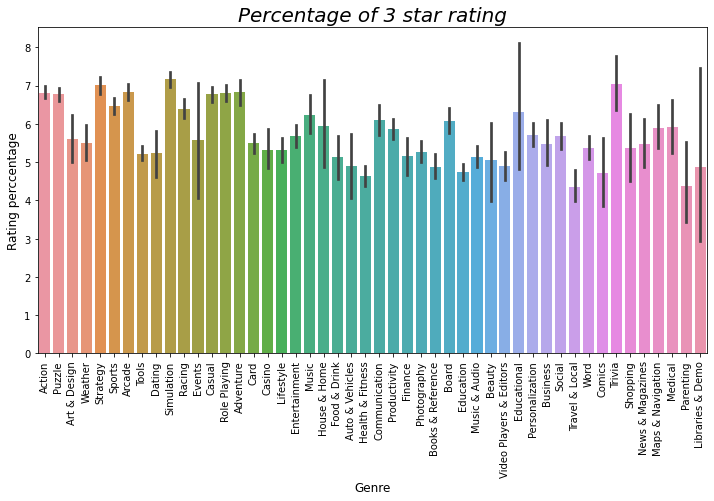

In [37]:
## which genre has highest percentage of 3 stars rating
plt.figure(figsize=(12,6))
sns.barplot(x='genre', y='rate_3_pc', data=df)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Rating perccentage', fontsize=12)
plt.xticks(rotation=90)
plt.title('Percentage of 3 star rating', fontsize=20, fontstyle='italic');

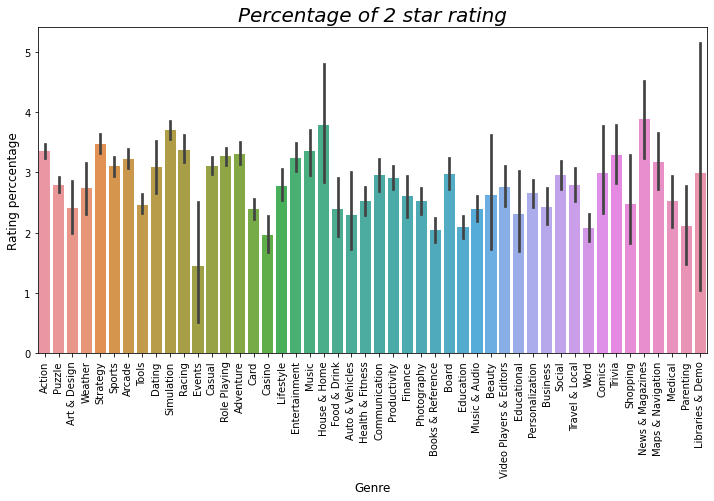

In [38]:
## which genre has highest percentage of 2 stars rating
plt.figure(figsize=(12,6))
sns.barplot(x='genre', y='rate_2_pc', data=df)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Rating perccentage', fontsize=12)
plt.xticks(rotation=90)
plt.title('Percentage of 2 star rating', fontsize=20, fontstyle='italic');

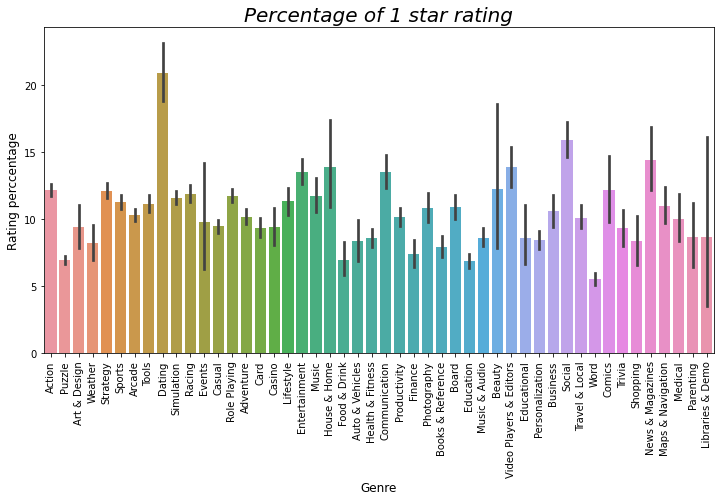

In [39]:
## which genre has highest percentage of 1 stars rating
plt.figure(figsize=(12,6))
sns.barplot(x='genre', y='rate_1_pc', data=df)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Rating perccentage', fontsize=12)
plt.xticks(rotation=90)
plt.title('Percentage of 1 star rating', fontsize=20, fontstyle='italic');

In [40]:
## how many apps are there under each genre
df.genre.value_counts()

Puzzle                     1664
Action                     1100
Education                  1082
Casual                     1027
Tools                      1017
Role Playing                990
Arcade                      986
Sports                      903
Simulation                  900
Strategy                    863
Health & Fitness            804
Productivity                701
Adventure                   544
Entertainment               529
Card                        529
Lifestyle                   526
Books & Reference           524
Music & Audio               479
Word                        452
Personalization             447
Photography                 438
Racing                      403
Travel & Local              381
Board                       380
Social                      316
Business                    249
Video Players & Editors     217
Communication               201
News & Magazines            180
Finance                     179
Maps & Navigation           162
Food & D

In [41]:
df.genre.value_counts().index

Index(['Puzzle', 'Action', 'Education', 'Casual', 'Tools', 'Role Playing',
       'Arcade', 'Sports', 'Simulation', 'Strategy', 'Health & Fitness',
       'Productivity', 'Adventure', 'Entertainment', 'Card', 'Lifestyle',
       'Books & Reference', 'Music & Audio', 'Word', 'Personalization',
       'Photography', 'Racing', 'Travel & Local', 'Board', 'Social',
       'Business', 'Video Players & Editors', 'Communication',
       'News & Magazines', 'Finance', 'Maps & Navigation', 'Food & Drink',
       'Dating', 'Weather', 'Trivia', 'Medical', 'Music', 'Casino',
       'Art & Design', 'Comics', 'Shopping', 'Parenting', 'Auto & Vehicles',
       'Educational', 'House & Home', 'Beauty', 'Events', 'Libraries & Demo'],
      dtype='object')

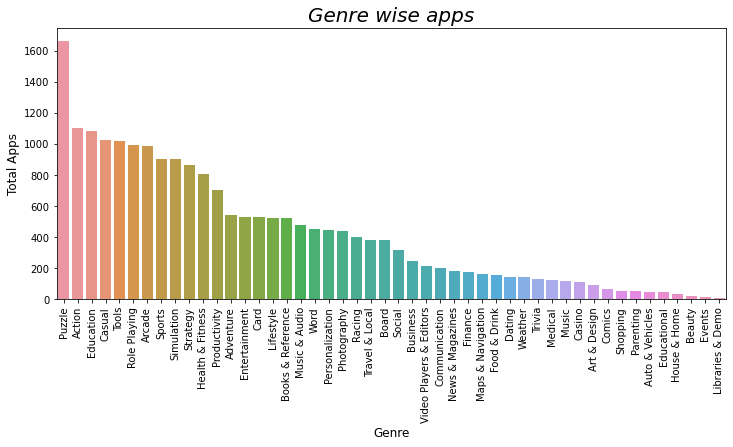

In [42]:
plt.figure(figsize=(12,5))
sns.countplot(x='genre', data=df,
              order=df.genre.value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Total Apps', fontsize=12)
plt.title('Genre wise apps', fontsize=20, fontstyle='italic');

In [43]:
##Analyse Puzzle apps
puzzle=df[df['genre']=='Puzzle']

In [44]:
puzzle.head(5)

,app_name,genre,rating,reviews,cost_label,rate_5_pc,rate_4_pc,rate_3_pc,rate_2_pc,rate_1_pc,updated,size,installs,current_version,requires_android,content_rating,in_app_products,offered_by,year
94,Mr Bullet - Spy Puzzles,Puzzle,4.1,"528,764 total",Install,64.5161,12.25810,7.74194,3.870970,11.61290,2020-04-07,40M,"50,000,000+",4.8,4.1 and up,Rated for 16+,"₫23,000 - ₫1,150,000 per item",Lion Studios,2020.0
148,Rope Puzzle,Puzzle,4.3,"18,271 total",Install,72.4638,7.97101,5.79710,4.347830,9.42029,2020-03-24,15M,"5,000,000+",1.0.20,5.0 and up,Rated for 3+,"₫23,000 - ₫575,000 per item",One Tap Studio,2020.0
233,Cut the Rope: Experiments FREE,Puzzle,4.4,"538,681 total",Install,74.6269,9.70149,5.97015,2.238810,7.46269,2018-06-27,37M,"50,000,000+",1.9.0,4.0.3 and up,Rated for 3+,"₫21,000 - ₫647,923 per item",ZeptoLab,2018.0
234,Cut the Rope: Time Travel,Puzzle,4.6,"1,094,452 total",Install,82.6446,9.91736,3.30579,0.826446,3.30579,2019-10-23,Varies with device,"50,000,000+",1.10.0,4.2 and up,Rated for 3+,"₫21,000 - ₫655,441 per item",ZeptoLab,2019.0
236,Cut the Rope 2,Puzzle,4.6,"2,265,680 total",Install,81.3008,10.56910,4.06504,0.813008,3.25203,2020-04-06,Varies with device,"100,000,000+",1.24.1,4.2 and up,Rated for 3+,"₫21,000 - ₫1,075,585 per item",ZeptoLab,2020.0


In [45]:
puzzle.shape

(1664, 19)

In [46]:
## overall average rating for puzzle apps
puzzle.rating.mean()

4.333954326923074

In [47]:
puzzle.groupby('genre')['rate_5_pc','rate_4_pc','rate_3_pc','rate_2_pc','rate_1_pc'].mean()

,rate_5_pc,rate_4_pc,rate_3_pc,rate_2_pc,rate_1_pc
genre,,,,,
Puzzle,69.345229,14.129247,6.766422,2.788485,6.970624


In [48]:
## Analyse Action category
action=df[df['genre']=='Action']

In [49]:
action

,app_name,genre,rating,reviews,cost_label,rate_5_pc,rate_4_pc,rate_3_pc,rate_2_pc,rate_1_pc,updated,size,installs,current_version,requires_android,content_rating,in_app_products,offered_by,year
1,Push'em all,Action,3.8,"119,679 total",Install,56.1798,12.92130,8.42697,5.056180,17.41570,2020-04-16,41M,"10,000,000+",1.14,4.4 and up,Rated for 3+,"₫92,000 per item",VOODOO,2020.0
2,Sky Fighters 3D,Action,4.2,"196,685 total",Install,67.1141,11.40940,7.38255,3.355700,10.73830,2019-05-14,19M,"10,000,000+",1.5,4.0 and up,Rated for 7+,"₫42,000 - ₫2,100,000 per item",Doodle Mobile Ltd.,2019.0
3,Robbery Bob,Action,4.3,"984,779 total",Install,74.0741,8.14815,5.18518,2.962960,9.62963,2020-03-25,42M,"50,000,000+",1.18.23,4.1 and up,Rated for 7+,"₫18,000 - ₫192,000 per item",Level Eight AB,2020.0
4,Shadow Fight 2,Action,4.6,"12,861,970 total",Install,85.4701,5.98291,2.56410,0.854701,5.12821,2020-04-15,142M,"100,000,000+",2.5.1,4.1 and up,Rated for 12+,"₫6,000 - ₫1,149,999 per item",NEKKI,2020.0
5,Cover Strike - 3D Team Shooter,Action,4.0,"43,322 total",Install,62.8931,9.43396,6.28931,4.402520,16.98110,2020-03-25,60M,"10,000,000+",1.2.369,4.1 and up,Rated for 12+,"₫23,000 - ₫1,200,000 per item",Top Actions,2020.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52578,Mobfish Hunter,Action,4.2,"54,137 total",Install,63.2911,17.08860,6.96203,3.797470,8.86076,2020-02-24,76M,"1,000,000+",3.9.4,4.2 and up,Rated for 7+,"₫22,000 - ₫1,100,000 per item",Appxplore (iCandy),2020.0
52609,Santa Dude,Action,3.9,"10,622 total",Install,62.5000,8.12500,5.62500,3.750000,20.00000,2018-05-24,19M,"1,000,000+",1.1.13,3.0 and up,Rated for 12+,"₫21,000 - ₫520,063 per item",Firezoo,2018.0
52630,Warlock.io : Action Arena Io Game,Action,4.2,16 total,Install,50.2513,31.15580,12.56280,0.000000,6.03015,2020-02-03,31M,"1,000+",0.8,4.4 and up,Rated for 3+,"₫16,000 - ₫349,000 per item",Homecooked Games,2020.0
52657,Sky Champ: Galaxy Space Shooter,Action,4.6,"42,204 total",Install,81.3008,8.13008,4.06504,1.626020,4.87805,2020-04-23,54M,"5,000,000+",6.2.1,4.1 and up,Rated for 3+,"₫22,000 - ₫1,100,000 per item",Spirit Bomb,2020.0


In [50]:
##overall average rating of acton apps
action.rating.mean()

4.140636363636365

In [51]:
## percentage rating wrt each star
action.groupby('genre')['rate_5_pc','rate_4_pc','rate_3_pc','rate_2_pc','rate_1_pc'].mean()

,rate_5_pc,rate_4_pc,rate_3_pc,rate_2_pc,rate_1_pc
genre,,,,,
Action,66.271661,11.415371,6.814353,3.353282,12.145338


In [52]:
## app size of the action apps
action.groupby('app_name')['size'].sum()

app_name
4Force Online                                             18M
A Hollow Doorway                                          49M
A Tag Knight                                              41M
AWP Mode: Elite online 3D sniper action    Varies with device
AXES.io                                                   68M
                                                  ...        
王牌特攻                                                      38M
裁決之刃                                                     5.2M
魔剣伝説                                                      94M
魔物獵人EXPLORE_MHXR                                         100M
🐓Chicken Gun🐓                                             56M
Name: size, Length: 1100, dtype: object

In [53]:
## which action app has more installs
action.groupby('app_name').installs.sum().sort_values(ascending=False)

app_name
Garena Free Fire: Wonderland                500,000,000+
Temple Run 2                                500,000,000+
Dead Spreading:Survival                         500,000+
Sniper Zombies: Offline Game                    500,000+
Death From Above                                500,000+
                                                ...     
Auto Arena - Duel of heroic                       1,000+
Goblin Wizard                                     1,000+
Soul Fighting                                     1,000+
No Gravity Lite - Space Combat Adventure          1,000+
Lily's battle!                                    1,000+
Name: installs, Length: 1100, dtype: object

In [54]:
## freefire
ff=action[action['app_name']=='Garena Free Fire: Wonderland']
ff

,app_name,genre,rating,reviews,cost_label,rate_5_pc,rate_4_pc,rate_3_pc,rate_2_pc,rate_1_pc,updated,size,installs,current_version,requires_android,content_rating,in_app_products,offered_by,year
52,Garena Free Fire: Wonderland,Action,4.3,"46,555,575 total",Install,76.3359,6.87023,3.81679,2.29008,10.687,2020-04-03,41M,"500,000,000+",1.47.0,4.0.3 and up,Rated for 12+,"₫6,000 - ₫2,550,000 per item",GARENA INTERNATIONAL I PRIVATE LIMITED,2020.0


In [55]:
##Temple run
tmp=action[action['app_name']=='Temple Run 2']
tmp

,app_name,genre,rating,reviews,cost_label,rate_5_pc,rate_4_pc,rate_3_pc,rate_2_pc,rate_1_pc,updated,size,installs,current_version,requires_android,content_rating,in_app_products,offered_by,year
25,Temple Run 2,Action,4.3,"9,083,755 total",Install,71.9424,10.0719,5.7554,2.8777,9.35252,2020-03-31,88M,"500,000,000+",1.66.0,4.1 and up,Rated for 7+,"₫23,000 - ₫1,150,000 per item",Imangi Studios,2020.0


In [56]:
##Analysis on Entertainment
ent=df[df['genre']=='Entertainment']

In [57]:
ent

,app_name,genre,rating,reviews,cost_label,rate_5_pc,rate_4_pc,rate_3_pc,rate_2_pc,rate_1_pc,updated,size,installs,current_version,requires_android,content_rating,in_app_products,offered_by,year
422,"iflix - Movies, TV Series & News",Entertainment,4.2,"532,724 total",Install,64.5161,15.48390,7.74194,3.225810,9.03226,2020-04-16,24M,"50,000,000+",3.45.0-19722,4.3 and up,Rated for 12+,"₫6,000 - ₫545,000 per item",iflix Sdn Bhd,2020.0
749,Talking Ginger,Entertainment,4.0,"1,828,203 total",Install,67.1141,7.38255,5.36913,2.684560,17.44970,2020-01-20,Varies with device,"100,000,000+",2.7.3.18,4.4 and up,Rated for 3+,"₫25,000 - ₫514,000 per item",Outfit7 Limited,2020.0
752,Talking Angela,Entertainment,3.5,"1,943,004 total",Install,54.3478,5.97826,5.97826,3.804350,29.89130,2019-11-04,49M,"100,000,000+",2.9.0.5,4.4 and up,Rated for 7+,"₫25,000 - ₫642,000 per item",Outfit7 Limited,2019.0
1398,TOYA Live,Entertainment,4.4,"2,915 total",Install,81.9672,2.45902,4.91803,0.819672,9.83607,2020-04-13,20M,"500,000+",1.5.13,5.0 and up,Rated for 12+,"₫23,000 - ₫9,000,000 per item",toya live,2020.0
1402,MCat,Entertainment,3.9,714 total,Install,56.4972,11.86440,12.99440,2.824860,15.81920,2020-03-30,37M,"100,000+",1.4.0,4.3 and up,Rated for 12+,"₫136,000 - ₫2,650,000 per item",VGame Interactive,2020.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53520,Netboom - 🎮Play PC games on Mobile 🔥Cloud Gaming,Entertainment,3.1,"10,312 total",Install,43.8596,7.45614,5.70175,4.385960,38.59650,2020-04-07,11M,"1,000,000+",1.0.9,5.0 and up,Rated for 12+,"₫23,000 - ₫6,950,000 per item",☆Editor's Choice Cloud Gaming App☆,2020.0
53582,DVR Hub for Xbox,Entertainment,4.4,"22,690 total",Install,74.0741,13.33330,4.44444,2.222220,5.92593,2020-02-16,33M,"500,000+",1.11.220,4.1 and up,Rated for 3+,"₫23,000 per item",Room408 Design,2020.0
53665,Real Terrorist Shooting Games: Gun Shoot War,Entertainment,4.3,192 total,Install,75.7576,6.81818,1.51515,8.333330,7.57576,2020-01-01,29M,"50,000+",1.6,5.0 and up,Rated for 12+,"₫178,000 per item",FPS Shooting Games,2020.0
53675,"9GAG: Funny gifs, pics, fresh memes & viral vi...",Entertainment,4.6,"1,636,211 total",Install,79.3651,14.28570,2.38095,0.793651,3.17460,2020-04-28,16M,"10,000,000+",6.82.01r21586-9e58adc554,5.0 and up,Rated for 12+,"₫21,000 - ₫302,000 per item",9GAG,2020.0


In [58]:
##Overall average rating of Entertainment app
ent.rating.mean()

4.119848771266539

In [59]:
##Uniques app under entertainment category
ent.app_name.nunique()

529

In [60]:
##Whict entertainment app has highest rating
ent.groupby('app_name').rating.max().sort_values(ascending=False)

app_name
Hiba Nawab                                          4.9
Birthday Cake Photo Frames Editor 2017              4.9
DROPOUT by CollegeHumor                             4.9
The Chosen                                          4.9
Haya-Entertaining voice chat app                    4.9
                                                   ... 
Pro Wrestling Illustrated                           2.4
Skin Packs for Minecraft                            2.3
스타플레이 : STARPLAY - KPOP 아이돌 콘텐츠 THE SHOW 더쇼 순위투표    2.3
Coastiality VR                                      2.2
Yarn - Chat Fiction                                 1.8
Name: rating, Length: 529, dtype: float64

In [61]:
## Which app has installed more
ent.groupby('app_name').installs.max().sort_values(ascending=False)

app_name
Netflix                                              500,000,000+
Laser Pointer for Cat Simulator                          500,000+
Sexopoly 🍑 Couple Sex Games & Truth or Dare              500,000+
Hype Text - Type Animated Text & Mojo Story Maker        500,000+
Posteroid                                                500,000+
                                                         ...     
ZAYNmoji                                                   1,000+
Viral Videos Daily                                         1,000+
Weave with iWeaveIt                                        1,000+
Steins;Gate ALARM                                          1,000+
MapGenie: Escape From Tarkov Map                           1,000+
Name: installs, Length: 529, dtype: object

In [62]:
## entertainment apps falls under which company
ent.offered_by.value_counts()

Color By Number Pixelart Pages - Coloring Arena    8
Outfit7 Limited                                    7
escapex Limited                                    6
Cosmic Mobile Apps                                 6
Map Genie                                          6
                                                  ..
Apalon Apps                                        1
ColorTime & PuzzleTime                             1
Coloring Games and Coloring Book for Adults        1
EYEWIND                                            1
App Robbers                                        1
Name: offered_by, Length: 394, dtype: int64

In [63]:
##Content rated
ent.groupby('content_rating').app_name.value_counts()

content_rating  app_name                                          
Rated for 12+   2020生肖運勢-靈機妙算姓名算命 靈符許願 點燈祈福 請仙庇佑 化太歲 紫微八字占卜 面相手相      1
                40 Психологических Тестов + тесты IQ                  1
                90s - Glitch VHS & Vaporwave Video Effects Editor     1
                9GAG: Funny gifs, pics, fresh memes & viral videos    1
                Akinator                                              1
                                                                     ..
Rated for 7+    Nimo TV – Live Game Streaming                         1
                Puma Family Sim Online                                1
                Smash Dude® - Graffiti                                1
                TFT Wiki                                              1
                Talking Angela                                        1
Name: app_name, Length: 529, dtype: int64

In [64]:
ent.content_rating.value_counts()

Rated for 3+     352
Rated for 12+    129
Rated for 16+     24
Rated for 18+     14
Rated for 7+      10
Name: content_rating, dtype: int64

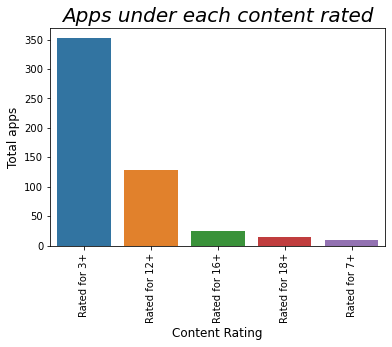

In [65]:
ent.content_rating.value_counts().index
sns.countplot(x='content_rating', data=ent,
             order=ent.content_rating.value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Content Rating', fontsize=12)
plt.ylabel('Total apps', fontsize=12)
plt.title('Apps under each content rated', fontsize=20, fontstyle='italic');